In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('churn.csv')
df.head()

,Unnamed: 0,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,0,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,...,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,0
1,1,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,Gift Vouchers/Coupons,...,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,0
2,2,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,Gift Vouchers/Coupons,...,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,1
3,3,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,...,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,1
4,4,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,Credit/Debit Card Offers,...,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,1


In [3]:
df.shape

(36992, 24)

In [4]:
df.isnull().sum()

Unnamed: 0                         0
age                                0
gender                             0
security_no                        0
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            288
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                3443
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    36992 non-null  int64  
 1   age                           36992 non-null  int64  
 2   gender                        36992 non-null  object 
 3   security_no                   36992 non-null  object 
 4   region_category               31564 non-null  object 
 5   membership_category           36992 non-null  object 
 6   joining_date                  36992 non-null  object 
 7   joined_through_referral       36992 non-null  object 
 8   referral_id                   36992 non-null  object 
 9   preferred_offer_types         36704 non-null  object 
 10  medium_of_operation           36992 non-null  object 
 11  internet_option               36992 non-null  object 
 12  last_visit_time               36992 non-null  object 
 13  d

In [6]:
df=df.dropna()

In [7]:
df.isnull().sum()

Unnamed: 0                      0
age                             0
gender                          0
security_no                     0
region_category                 0
membership_category             0
joining_date                    0
joined_through_referral         0
referral_id                     0
preferred_offer_types           0
medium_of_operation             0
internet_option                 0
last_visit_time                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
churn_risk_score                0
dtype: int64

In [8]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [9]:
df['avg_frequency_login_days']=pd.to_numeric(df['avg_frequency_login_days'], errors='coerce', downcast='float')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28373 entries, 0 to 36991
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           28373 non-null  int64  
 1   gender                        28373 non-null  object 
 2   security_no                   28373 non-null  object 
 3   region_category               28373 non-null  object 
 4   membership_category           28373 non-null  object 
 5   joining_date                  28373 non-null  object 
 6   joined_through_referral       28373 non-null  object 
 7   referral_id                   28373 non-null  object 
 8   preferred_offer_types         28373 non-null  object 
 9   medium_of_operation           28373 non-null  object 
 10  internet_option               28373 non-null  object 
 11  last_visit_time               28373 non-null  object 
 12  days_since_last_login         28373 non-null  int64  
 13  avg_ti

In [11]:
df.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score
count,28373.000000,28373.000000,28373.000000,28373.000000,25673.000000,28373.000000,28373.000000
mean,37.081310,-42.587319,243.610043,29314.556610,15.982882,688.008287,0.539703
std,15.894149,230.134583,401.153815,19509.169615,9.244269,194.227585,0.498430
min,10.000000,-999.000000,-2814.109110,800.460000,-43.652702,-760.661236,0.000000
25%,23.000000,8.000000,59.840000,14191.820000,9.000000,616.620000,0.000000
50%,37.000000,12.000000,161.670000,27562.670000,16.000000,698.480000,1.000000
75%,51.000000,16.000000,356.580000,40901.120000,23.000000,764.960000,1.000000
max,64.000000,26.000000,3040.410000,99914.050000,73.061996,2069.069761,1.000000


In [12]:
df.head()

,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,?,...,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,0
2,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,Gift Vouchers/Coupons,Desktop,...,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,1
3,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,Desktop,...,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,1
4,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,...,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,1
5,13,M,PSG1LGF,City,Gold Membership,2016-01-08,No,xxxxxxxx,Gift Vouchers/Coupons,?,...,433.62,13884.77,24.0,722.27,Yes,No,Yes,Unsolved,No reason specified,0


Text(0.5, 1.0, 'Distribution of Churn Risk Scores')

<Figure size 500x500 with 0 Axes>

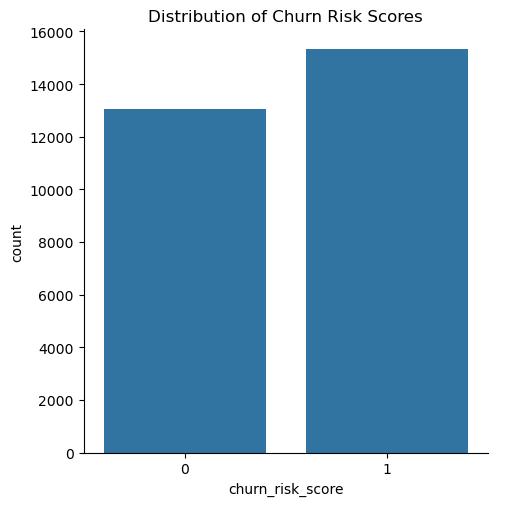

In [13]:
# Analyze the distribution of the target variable (churn_risk_score)
plt.figure(figsize=(5,5))
sns.catplot(data=df, kind='count', x='churn_risk_score')
plt.title('Distribution of Churn Risk Scores')

Text(0.5, 1.0, 'Distribution of Region Categories')

<Figure size 500x500 with 0 Axes>

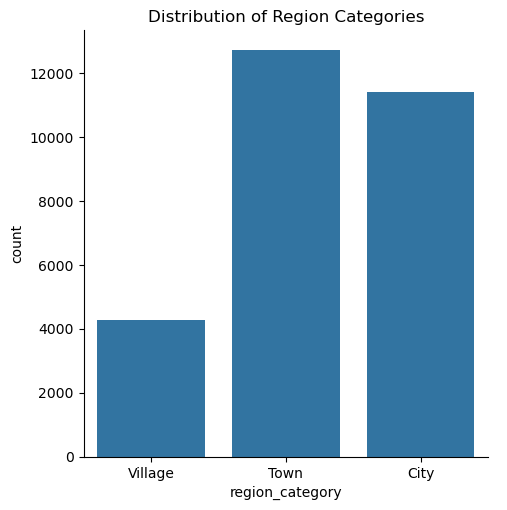

In [14]:
# Demographic or regional bias
plt.figure(figsize=(5,5))
sns.catplot(data=df, x='region_category', kind='count')
plt.title('Distribution of Region Categories')

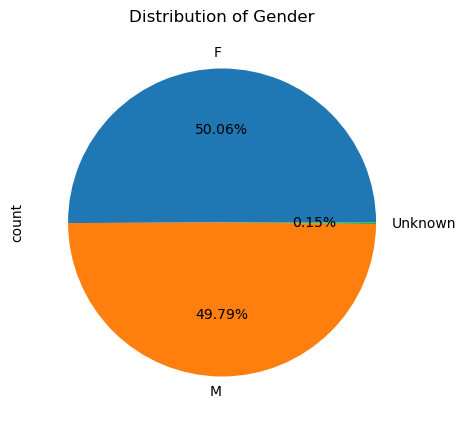

In [15]:
# Gender bias
plt.figure(figsize=(5,5))
df['gender'].value_counts().plot(kind='pie', autopct='%1.2f%%')
plt.title('Distribution of Gender')
plt.show()

Text(0.5, 1.0, 'Distribution of Age')

<Figure size 500x500 with 0 Axes>

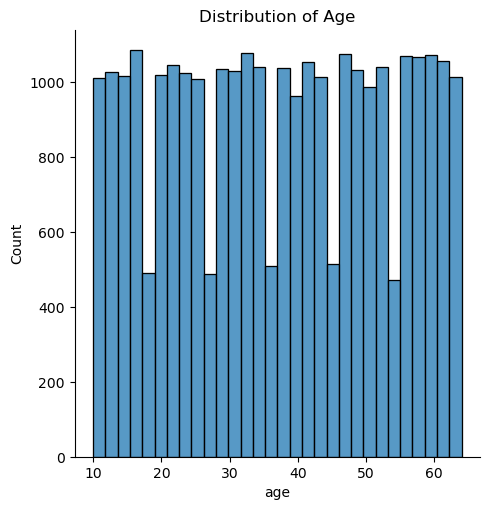

In [16]:
# Distribution of Age
plt.figure(figsize=(5,5))
sns.displot(data=df, kind='hist', x='age')
plt.title('Distribution of Age')

Text(0.5, 1.0, 'Distribution of Avg time spent')

<Figure size 500x500 with 0 Axes>

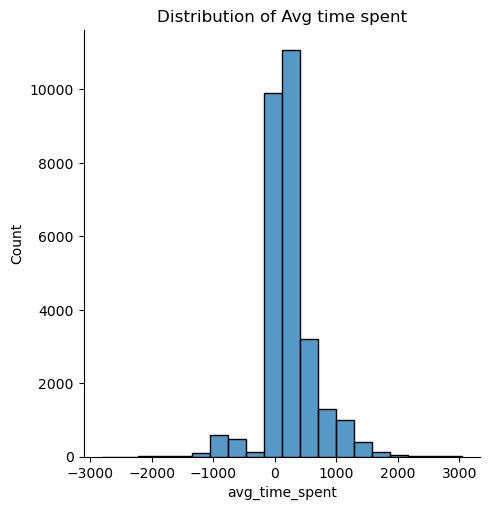

In [17]:
# Distribution of Avg time spent
plt.figure(figsize=(5,5))
sns.displot(data=df, kind='hist', x='avg_time_spent', bins=20)
plt.title('Distribution of Avg time spent')

Text(0.5, 1.0, 'Distribution of Avg transaction value')

<Figure size 500x500 with 0 Axes>

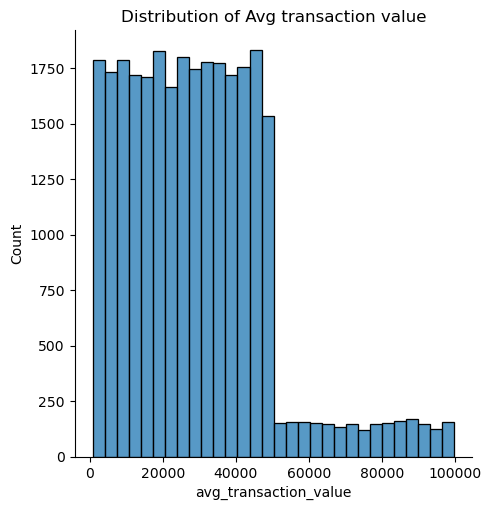

In [18]:
# Distribution of Average Transaction Value
plt.figure(figsize=(5,5))
sns.displot(data=df, kind='hist', x='avg_transaction_value', bins=30)
plt.title('Distribution of Avg transaction value')

Text(0.5, 1.0, 'Distribution of Avg frequency of login days')

<Figure size 500x500 with 0 Axes>

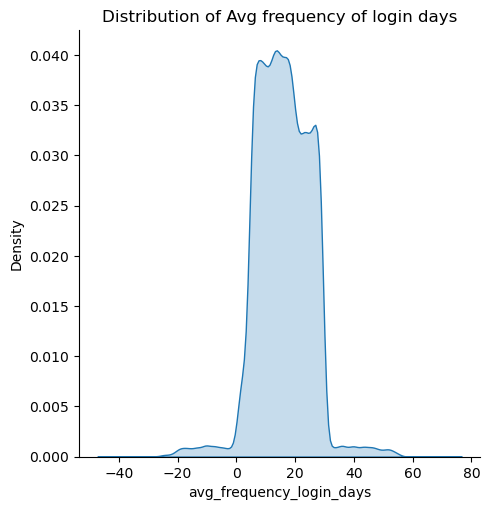

In [19]:
# Distribution of Avg frequency of login days
plt.figure(figsize=(5,5))
sns.displot(data=df, kind='kde', x='avg_frequency_login_days', fill=True)
plt.title("Distribution of Avg frequency of login days")

Text(0.5, 1.0, 'Distribution of points in wallets')

<Figure size 500x500 with 0 Axes>

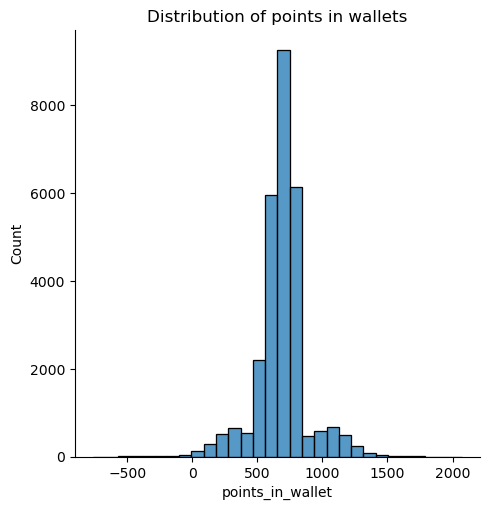

In [20]:
# The distribution of "points_in_wallet"
plt.figure(figsize=(5,5))
sns.displot(data=df, kind='hist', x='points_in_wallet', bins=30)
plt.title('Distribution of points in wallets')


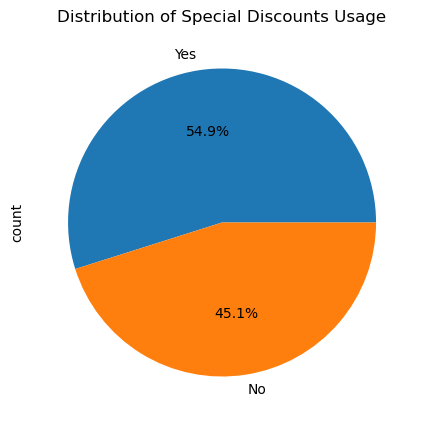

In [21]:
# Explore the distribution of "used_special_discount"
plt.figure(figsize=(5, 5))
df['used_special_discount'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Special Discounts Usage')
plt.show()

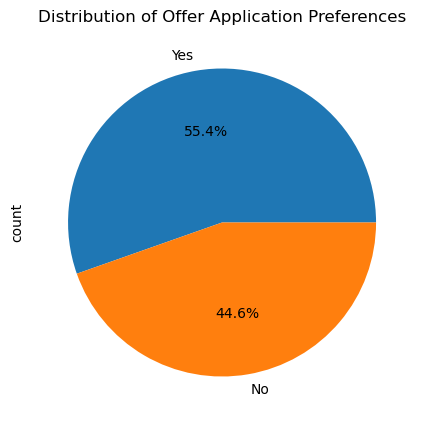

In [22]:
# Explore the distribution of "offer_application_preference"
plt.figure(figsize=(5, 5))
df['offer_application_preference'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Offer Application Preferences')
plt.show()


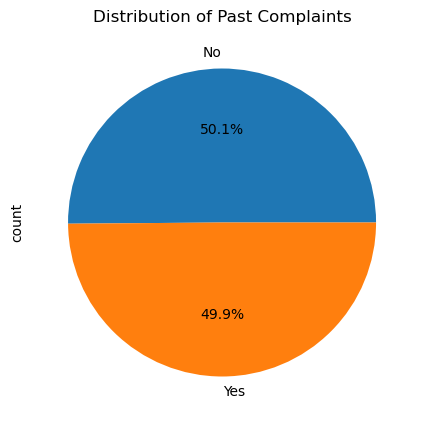

In [23]:
# Explore the distribution of "past_complaint"
plt.figure(figsize=(5, 5))
df['past_complaint'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Past Complaints')
plt.show()


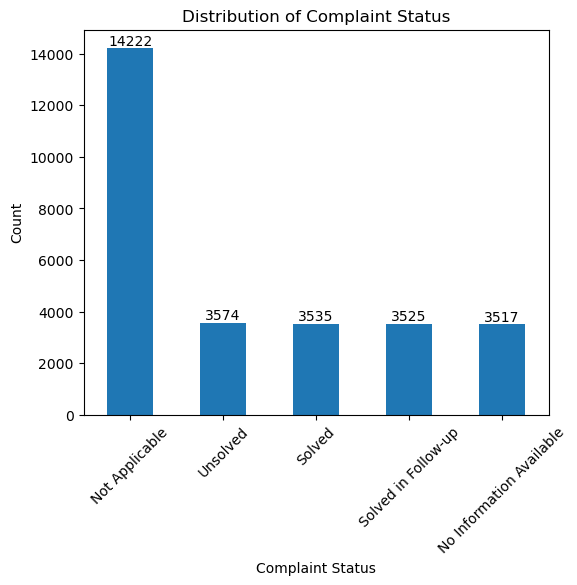

In [24]:
# Explore the distribution of "complaint_status"
plt.figure(figsize=(6, 5))
ax=df['complaint_status'].value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45)
plt.title('Distribution of Complaint Status')
plt.xlabel('Complaint Status')
plt.ylabel('Count')
plt.show()

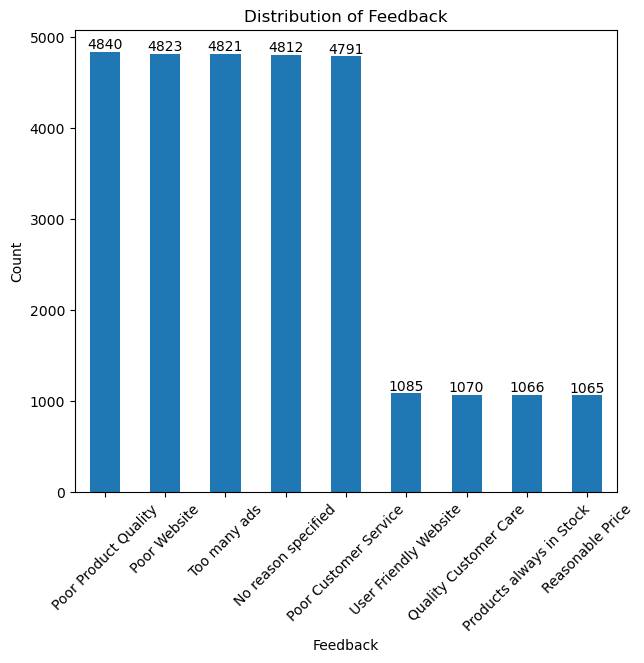

In [25]:
# Explore the distribution of "feedback"
plt.figure(figsize=(7, 6))
ax=df['feedback'].value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45)
plt.title('Distribution of Feedback')
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'Gender Distribution by Churn Risk Score')

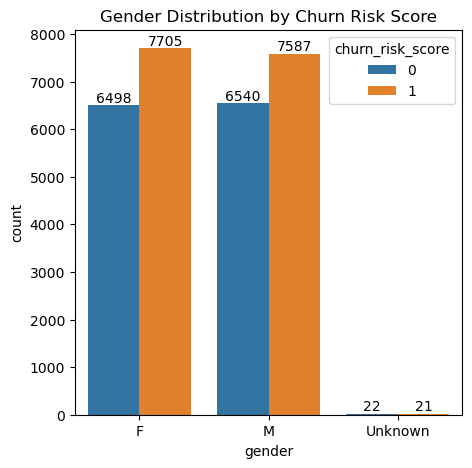

In [39]:
# Create a bar plot of gender distribution by churn status
plt.figure(figsize=(5,5))
ax=sns.countplot(data=df, x='gender', hue='churn_risk_score')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.title('Gender Distribution by Churn Risk Score')


Text(0.5, 1.0, 'Gender Distribution by Churn Risk Score')

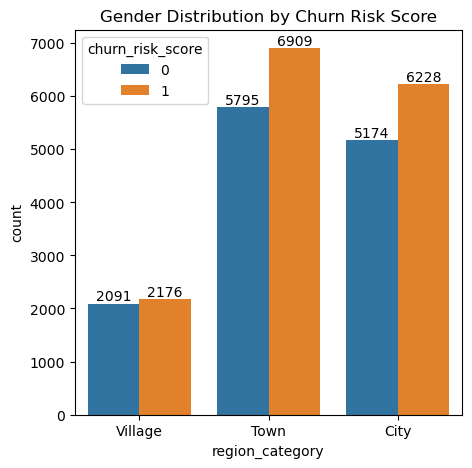

In [37]:
# Distribution of region with churn risk score
plt.figure(figsize=(5,5))
ax=sns.countplot(data=df, x='region_category', hue='churn_risk_score')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Gender Distribution by Churn Risk Score')


Text(0.5, 1.0, 'Distribution of Avg transaction value by churn risk score')

<Figure size 500x500 with 0 Axes>

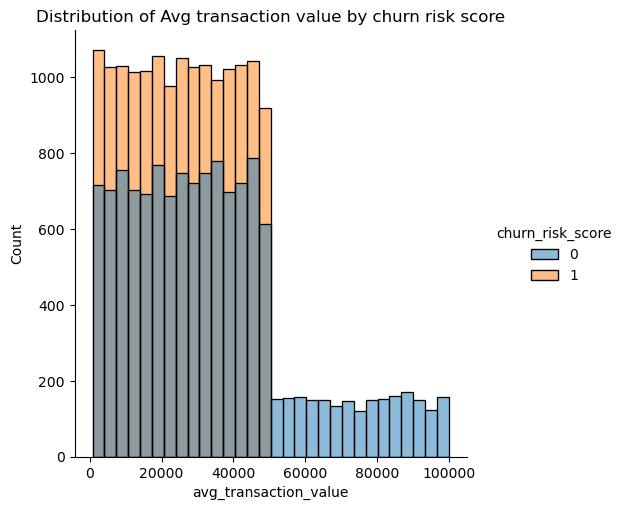

In [29]:
# Churn risk with avg transaction value
plt.figure(figsize=(5,5))
sns.displot(data=df, kind='hist', x='avg_transaction_value', bins=30, hue='churn_risk_score')
plt.title('Distribution of Avg transaction value by churn risk score')


Text(0.5, 1.0, 'Dist. of Avg frequency of login days with churn risk score')

<Figure size 500x500 with 0 Axes>

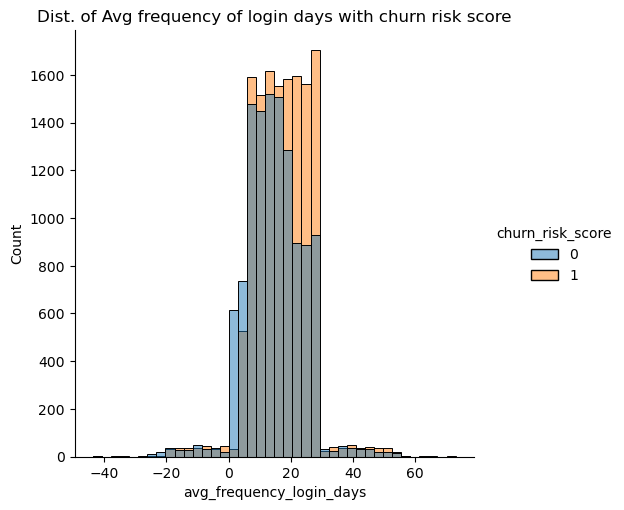

In [30]:
plt.figure(figsize=(5,5))
sns.displot(data=df, kind='hist', x='avg_frequency_login_days', hue='churn_risk_score', bins=40)
plt.title("Dist. of Avg frequency of login days with churn risk score")

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Not Applicable'),
  Text(1, 0, 'Solved in Follow-up'),
  Text(2, 0, 'Unsolved'),
  Text(3, 0, 'Solved'),
  Text(4, 0, 'No Information Available')])

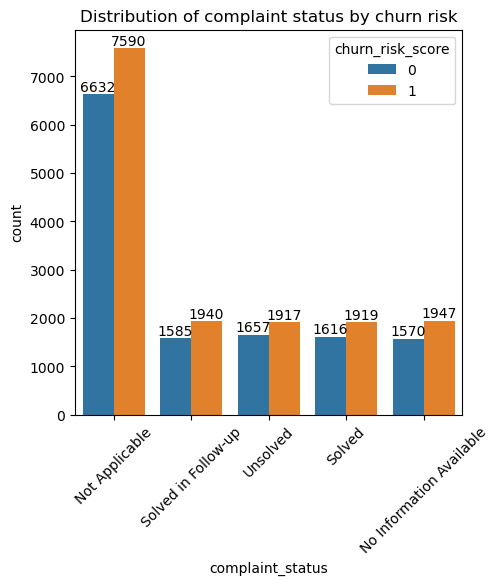

In [35]:
plt.figure(figsize=(5,5))
ax=sns.countplot(data=df, x='complaint_status', hue='churn_risk_score')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Distribution of complaint status by churn risk')
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Distribution of Avg time spent by churn risk score')

<Figure size 500x500 with 0 Axes>

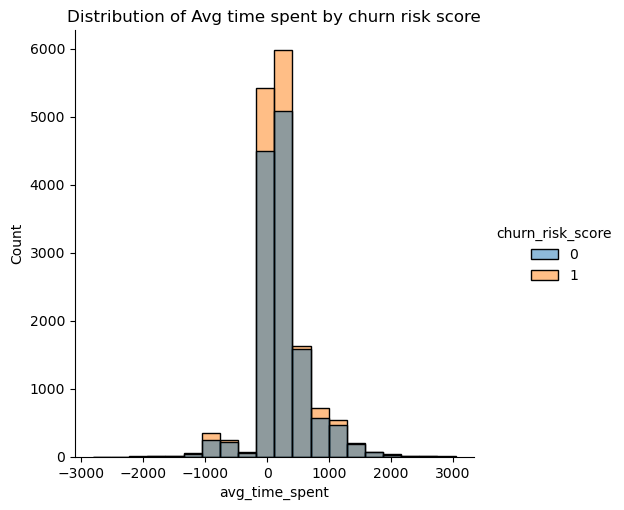

In [33]:
plt.figure(figsize=(5,5))
sns.displot(data=df, kind='hist', x='avg_time_spent', bins=20, hue='churn_risk_score')
plt.title('Distribution of Avg time spent by churn risk score')